<a href="https://colab.research.google.com/github/bootstrap666/Estocasticos2021Exercicio3/blob/main/Monty_Hall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimento de Monty Hall

Considere um jogo a seguir: um apresentador, apresenta quatro portas aos concorrentes. Atrás de uma delas estava um prêmio (um carro) e, atrás das outras três, três bodes.



1.   Na 1.ª etapa o concorrente escolhe uma das quatro portas (que ainda não é aberta);

2.   Na 2.ª etapa, o apresentador abre uma das outras três portas que o concorrente não escolheu, revelando que o carro não se encontra nessa porta e revelando um dos bodes;
3.   Na 3.ª etapa o apresentador pergunta ao concorrente se quer decidir permanecer com a porta que escolheu no início do jogo ou se ele pretende mudar para a outra porta que ainda está fechada para então a abrir. Agora, com três portas apenas para escolher — pois uma delas já se viu, na 2.ª etapa, que não tinha o prêmio — e sabendo que o carro está atrás de uma das restantes, o concorrente tem que tomar a decisão.




a) Determine a probabilidade do participante vencer o jogo (ganhar o carro) escolhendo trocar a porta na terceira etapa

b) Realize uma simulação de Monte Carlo que comprove o resultado determinado no item a)

In [ ]:
import numpy as np
import random

In [ ]:
n_portas = 10

pvitoria = (n_portas-1)/(n_portas*(n_portas-2))
print(pvitoria)

0.1125


Para simular uma rodada do jogo, utilizam-se 3 listas contendo o número das portas.

portas contém os números naturais de 1 até n_portas e é utilizada para sortear a porta premiada e a porta escolhida durante a primeira rodada do jogo. Para o gráfico, estamos assumindo que a porta escolhida é diferente da porta premiada

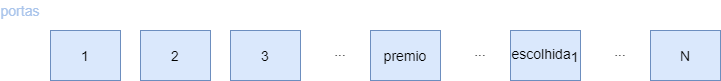

portas_segunda_rodada é a lista de portas candidatas a serem escolhidas pelo participante após aceitar trocar de porta na segunda rodada. É formada a partir de portas removendo dois elementos: a porta escolhida pelo participante na primeira rodada e uma porta sem prêmio escolhida aleatoriamente que é aberta pelo apresentador antes de dar ao participante a oportunidade de trocar de porta. Nesse exemplo, a porta 3 foi aberta pelo apresentador.

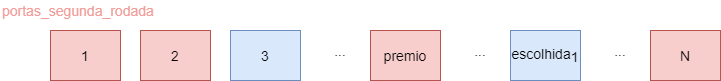

Para sortear uma porta sem premio a ser aberta pelo apresentador, é utilizada uma terceira lista portas_segunda_rodada_sem_premio a partir de portas na qual a porta premiada e a porta escolhida na primeira rodada são removidas. Caso a porta escolhida na primeira rodada seja a porta premiada, apenas uma porta é removida.

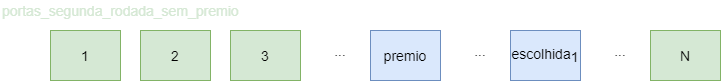

Finalmente, se a porta escolhida na segunda rodada (sorteada aleatoriamente de portas_segnda_rodada) for a porta premiada, incrementa-se um contador de vitórias.

In [ ]:
n_rodadas = 50000

vitorias = 0

portas = np.array(range(1,n_portas+1))

for i in range(n_rodadas):
  # Primeira rodada do jogo
  porta_premiada = portas[random.randint(0,n_portas-1)]   # escolhe uma porta como a porta premiada
  porta_escolhida1 = portas[random.randint(0,n_portas-1)] # O participante escolhe aleatoriamente uma porta na primeira rodada
  #----------------------------------------------------------------------------------------------------------------------
  # Segunda rodada 
  # inicialmente, forma-se uma lista de portas candidatas removendo a porta escolhida na primeira rodada
  portas_segunda_rodada = np.delete(portas,np.where(portas == porta_escolhida1)) 
  # forma-se uma lista de portas que podem ser abertas pelo apresentador removendo a porta premiada da lista de portas candidatas
  portas_segunda_rodada_sem_premio = np.delete(portas_segunda_rodada,np.where(portas_segunda_rodada == porta_premiada)) 
  # escolhe dentre as portas sem premio, uma a ser aberta pelo apresentador
  porta_aberta = portas_segunda_rodada_sem_premio[random.randint(0,n_portas-3)]
  # remove a porta aberta da lista de portas candidatas
  portas_segunda_rodada = np.delete(portas_segunda_rodada,np.where(portas_segunda_rodada == porta_aberta))
  # finalmente, escolhe-se aleatoriamente uma dentre as portas candidatas como a porta da segunda rodada. Se ela for a porta premiada, incrementa-se o contador de vitórias
  porta_escolhida2 = portas_segunda_rodada[random.randint(0,n_portas-3)]
  if porta_escolhida2 == porta_premiada:
    vitorias = vitorias+1

print (vitorias/n_rodadas)

0.11468
